In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
dataset = pd.read_csv("estate.csv")

In [22]:
dataset

,distance_to_station,house_price
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1
...,...,...
409,4082.01500,15.4
410,90.45606,50.0
411,390.96960,40.6
412,104.81010,52.5


In [23]:
dataset.corr()

,distance_to_station,house_price
distance_to_station,1.000000,-0.673613
house_price,-0.673613,1.000000


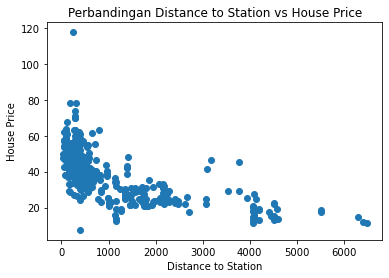

In [24]:
data = pd.DataFrame(dataset)
plt.scatter(data.distance_to_station, data.house_price)
plt.xlabel("Distance to Station")
plt.ylabel('House Price')
plt.title("Perbandingan Distance to Station vs House Price")
plt.show()

## Training

In [25]:
#Membagi dataset menjadi data train dan data test
x = np.array(data.distance_to_station)
y = np.array(data.house_price)

x_train = x.reshape(-1,1)
y_train = y


In [26]:
print(x, x_train)

[  84.87882  306.5947   561.9845   561.9845   390.5684  2175.03
  623.4731   287.6025  5512.038   1783.18     405.2134    90.45606
  492.2313  2469.645   1164.838    579.2083   292.9978   350.8515
  368.1363    23.38284 2275.877    279.1726  1360.139    279.1726
  480.6977  1487.868    383.8624   276.449    557.478    451.2438
 4519.69     769.4034   488.5727   323.655    205.367   4079.418
 1935.009   1360.139    577.9615   289.3248  4082.015   4066.587
  519.4617   512.7871   533.4762   488.8193   463.9623   640.7391
 4605.749   4510.359    512.5487  1758.406   1438.579    492.2313
  289.3248  1160.632    371.2495    56.47425 4510.359    336.0532
 1931.207    259.6607  2175.877    533.4762   995.7554   123.7429
  193.5845   104.8101   464.223    561.9845    90.45606  640.7391
  424.5442  4082.015    379.5575  1360.139    616.4004  2185.128
  552.4371  1414.837    533.4762   377.7956   150.9347  2707.392
  383.2805   338.9679  1455.798   4066.587   1406.43    3947.945
  274.0144  1402

In [27]:
#Training Proses 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

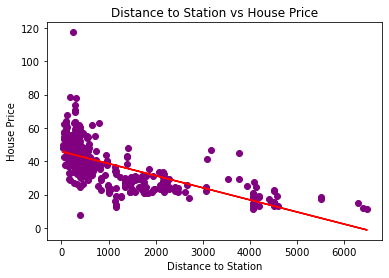

In [28]:
plt.scatter(x_train, y_train, color = "purple")  
plt.plot(x_train, model.predict(x_train), color = "red")
plt.xlabel("Distance to Station")
plt.ylabel("House Price")
plt.title("Distance to Station vs House Price")
plt.show()


In [29]:
print(f'intercept: {model.intercept_}') 
print(f'slope: {model.coef_}')

print(model.coef_ + (model.intercept_*100))
#intercept = b
#slope = a
#y = 6700.xxx

intercept: 45.851427057774984
slope: [-0.00726205]
[4585.13544373]


## Testing Process

In [30]:
x_test = np.array([62, 73, 82, 90, 100]).reshape(-1,1) 
y_test = np.array([160, 170, 180, 190, 200])

prediksi_penjualan= model.predict(x_test)
print(prediksi_penjualan)


[45.40117986 45.32129729 45.25593883 45.19784241 45.1252219 ]


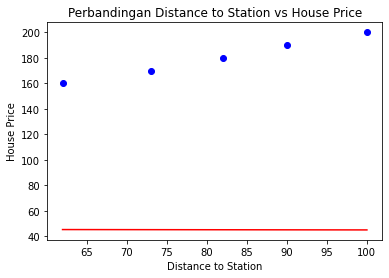

In [31]:
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_test, prediksi_penjualan, color = "red")
plt.xlabel("Distance to Station")
plt.ylabel("House Price")
plt.title("Perbandingan Distance to Station vs House Price")
plt.show()

## Cek Akurasi

In [32]:
from sklearn.metrics import r2_score
akurasi = r2_score(y_test, prediksi_penjualan)
print(akurasi)

-90.78749224438378
